In [3]:
# 도수분포표 vs 히스토그램
# 도수분포표 : 특정 구간에 속하는 자료의 개수를 표현 (도수 분포 - 위키백과, 우리 모두의 백과사전)
# 히스토그램 : 도수분포표를 시각화하여 막대그래프로 표현, 하지만 bar plot과는 다름 (히스토그램 - 위키백과, 우리 모두의 백과사전)
# 막대그래프 vs 히스토그램 (bar plot vs hist plot)
# bar plot : 표현 값에 비례하여 높이와 길이를 지닌 직사각형 막대로 범주형 데이터를 표현하는 차트나 그래프, 합계, 평균 등의 수치를 시각화 (막대 그래프 - 위키백과, 우리 모두의 백과사전)
# hist plot : 구간별 빈도수를 표현
# 히스토그램 vs 정규분포 (hist plot vs density plot)
# hist plot : 구간별 빈도수
# density plot : 확률 밀도 함수 - 확률 변수의 밀도를 표현 (정규 분포 - 위키백과, 우리 모두의 백과사전)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 
                    'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, 
                   columns=['a', 'b', 'c'])
df4.head()

,a,b,c
0,0.577556,0.269028,-0.409830
1,0.390546,-1.100617,0.005343
2,-0.340436,-1.631421,-1.150381
3,0.514682,-0.451457,-2.123541
4,0.698525,-0.283705,-1.095789


<AxesSubplot:ylabel='Frequency'>

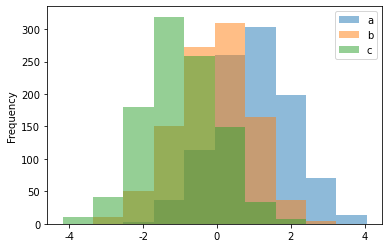

In [6]:
# alpha : 투명도
df4.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

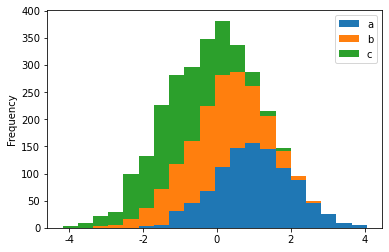

In [7]:
# stacked : 누적
# bins에 다라 frequency 차이
df4.plot.hist(stacked=True, bins=20)

<AxesSubplot:xlabel='Frequency'>

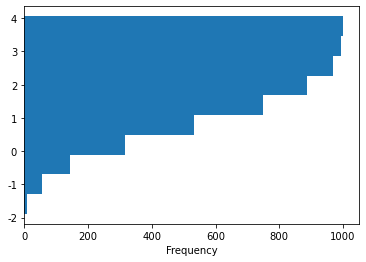

In [8]:
# orientation='horizontal' : x, y축을 바꿈
# cumulative : 누적
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

<AxesSubplot:>

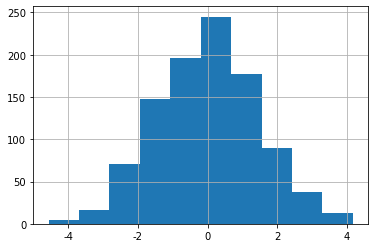

In [9]:
# diff()를 이용하여 차분
df4['a'].diff().hist()

In [10]:
df4['a_diff'] = df4['a'].diff()
df4['a_shift'] = df4['a'].shift(1)
df4['a_minus'] = df4['a'] - df4['a_shift']
df4[['a', 'a_shift', 'a_minus', 'a_diff']].head()

,a,a_shift,a_minus,a_diff
0,0.577556,NaN,NaN,NaN
1,0.390546,0.577556,-0.187010,-0.187010
2,-0.340436,0.390546,-0.730983,-0.730983
3,0.514682,-0.340436,0.855119,0.855119
4,0.698525,0.514682,0.183843,0.183843


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>, <AxesSubplot:>]], dtype=object)

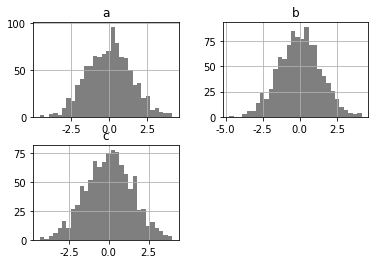

In [11]:
df4[['a', 'b', 'c']].diff().hist(color='k', alpha=0.5, bins=30)

In [12]:
data = pd.Series(np.random.randn(1000))

# 카테고리 생성
data = pd.DataFrame({'a' : np.random.randn(1000),
                    'b': np.random.randint(0, 4, 1000) })
data.head()

,a,b
0,0.252349,0
1,-1.453238,2
2,-0.637629,0
3,0.813810,0
4,2.598298,3


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

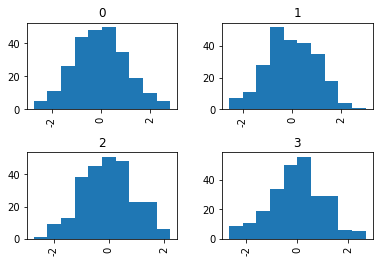

In [13]:
# 카테고리별로 그래프 표현
data['a'].hist(by=data['b'], figsize=(6, 4))